# Discrete Time Dynamical Systems and Updating Functions

## Rationale

* Discrete time dynamical systems models enable long run predictions about systems from data and initial conditions. 
* Follow the `basic steps of applied mathematics`: quantify the basic measurement and describe the dynamical rule. 

A discrete time dynamical system describes the relation between a system with a known updating function at an initial time, a final time, and an interval in between. Denote $m_t$ the measurement at the beginning of the experiment and $m_{t+1}$ the measurement at the next time step. So, 
$$
m_{t+1}= f(m_t)
$$

Notably, the time steps are discrete, as the name implies. The timesteps can be small, and this method is ammenable to numerical integration with computers.  

## Simple Simulation Process

1. Define the mathematical model
2. Set initial conditions and simulation parameters
    1. Should include a final timepoint 
3. Apply Euler's method: 
    1. Make an array to store the time dimension
    2. Initialize an array to store the $f(t)$ dimension
    3. Make an $F(0)$ constant
    4. Use a for-loop to iterate throught the time array, using each timepoint to calculate and store the $f(t)$. 
4. Initialize the arrays
5. Write the simulation loop
6. Plot the results

## The Model
For a simple model of population growth,
$$
dN/dt= r\,N
$$

where, $r$ is the birth rate constant and $N$ is the current number of individuals. Additional constants include- $T$ the total time to simulate, $N_0$ the initial population size, and $dt$ the discrete timestep being modeled.

Note that this model is said to be an `autonomous` differential equation, because the derivative depends on the state variable $N$, rather than only on time. If the derivative depends on time, we would say the model is a `pure time` differential equation. 

## Euler's Method
To solve a differential equation, we need to recover a characteristic function from its rate of change. There are several methods to do this, collectively they are known as `Runge-Kutta` methods. Suppose we know or estimate that the solution of the differential equation:
$$
\frac{dy}{dt}= f(t,y)
$$

takes on some value $y=y_0$ at time $t=t_0$. Our gol is to estimate the value of $y_1=y(t_0 + h)$ with step size $h$. In other words, we use the updating function to calculate the function value at each timestep in the future. Euler's method uses the tangent line to estimate:
$$
N(t+\Delta{t})\approx N(t) + \Delta{t}\cdot \frac{dN}{dt}(t)
$$

Importantly, the error in the approximation of the analytical solution is proportional to the square of $dt$. So it is generally better to take small steps when possible. Other methods, such as the midpoint method, generally perform more accurately than Euler's method. 

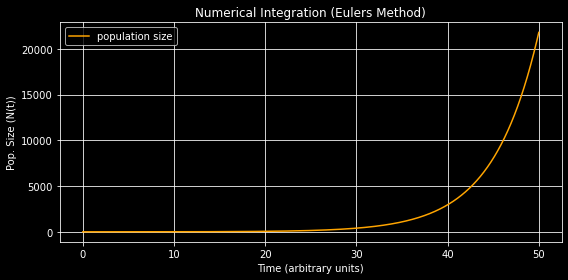

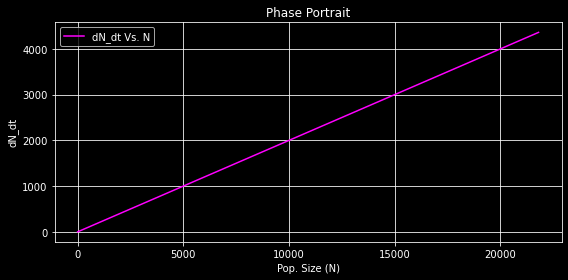

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the model parameters
r= 0.2 # birth rate pop. size/time
N0= 1 # initial pop. size
dt= 0.01 # timestep (arbitrary units)
T= 50 # total time for the simulation (Arbitrary units)

# Create the arrays

time_points= np.arange(0, T + dt, dt) # zero to final time in increments of dt
N= np.zeros(len(time_points)) # stores the population growth for each time step
N[0]= N0 # set the first value in the array to the initial pop. size

# Loop for Euler's method
for i in range(1, len(time_points)): # loop through the time array
    dN= r * N[i-1] # compute the derivative; N[i=1] b/c we're starting with an initial value and computing the next one in the array
    N[i]= N[i-1] + dt * dN # update the pop. size array
    
# Plot the numerically integrated results
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(time_points, N, color='orange', label='population size')
plt.title('Numerical Integration (Eulers Method)')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Pop. Size (N(t))')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot a phase portrait
dN_dt= r * N # Compute the values of the derivative
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(N, dN_dt, color='magenta', label='dN_dt Vs. N')
plt.title('Phase Portrait')
plt.xlabel('Pop. Size (N)')
plt.ylabel('dN_dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Growth With Carrying Capacity
Populations cannot grow indefinitely, and become resource limited. Here, we modify the original differential equation to account for resource limitation using a carrying capacity $k$ which represents the population size at which the rate of change of growth transitions from a positive to negative value. 

$$
dN/dt= r\,N\,(1-\frac{N}{k})
$$

where, $r$ is the birth rate constant, $N$ is the current number of individuals, and $k$ is the carrying capacity. Additional constants include- $T$ the total time to simulate, $N_0$ the initial population size, and $dt$ the discrete timestep being modeled.

Note that this model is still said to be an `autonomous` differential equation, because the derivative depends on the state variable $N$, rather than only on time. 

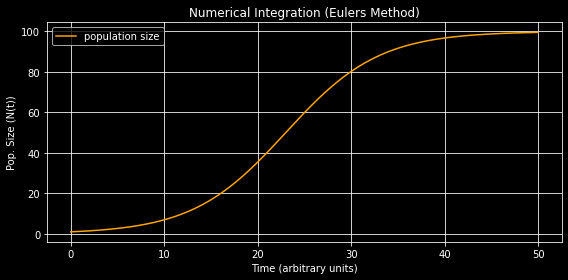

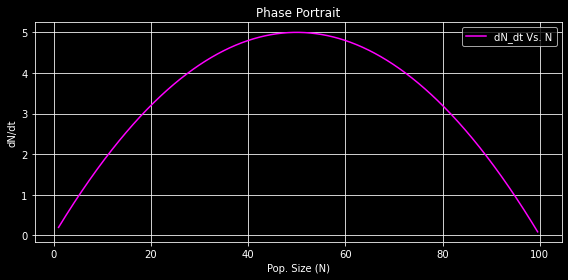

In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the model parameters
r= 0.2 # birth rate pop. size/time
N0= 1 # initial pop. size
dt= 0.01 # timestep (arbitrary units)
T= 50 # total time for the simulation (Arbitrary units)
k=100

# Create the arrays

time_points= np.arange(0, T + dt, dt) # zero to final time in increments of dt
N= np.zeros(len(time_points)) # stores the population growth for each time step
N[0]= N0 # set the first value in the array to the initial pop. size

# Simulation loop using Euler's method
for i in range(1, len(time_points)): # loop through the time array
    dN= r * N[i-1] * (1 - N[i-1] / k) # compute the derivative; N[i=1] b/c we're starting with an initial value and computing the next one in the array
    N[i]= N[i-1] + dt * dN # update the pop. size array
    
# Plot the numerically integrated results
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(time_points, N, color='orange', label='population size')
plt.title('Numerical Integration (Eulers Method)')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Pop. Size (N(t))')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot a phase portrait
dN_dt= r * N * (1 - N / k) # Compute the values of the derivative
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(N, dN_dt, color='magenta', label='dN_dt Vs. N')
plt.title('Phase Portrait')
plt.xlabel('Pop. Size (N)')
plt.ylabel('dN/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Systems of Coupled Differential Equations

Next we'll examine a system of coupled differential equations using the Lotka-Voltera Predator-Prey dynamics model. In this model, the population growth of a prey species is influenced by the population growth of a predator species. Importantly, the populations become dynamically interrelated because they influence each other's growth rates. The predator species relies on the prey population for food, and the prey species will reach carrying capacity if the population grows too large due to lack of predation. The predator population exhibits negative feedback on the prey population. The model consists of two autonomous differential equations: 
$$
\begin{cases}
\frac{dx}{dt}= a\,x-b\,x\,y \\
\frac{dy}{dt}= -c\,y+d\,x\,y 
\end{cases}
$$

Where $x(t)$ is the prey population size at time $(t)$ and $y(t)$ is the predator population size. $a$ is the prey population growth rate (indivs/time). $\frac{dx}{dt}= a\,x$ when $y=0$. $b$ is the predation coefficient (1/time x population). $xy$ represents the number of predator-prey interactions. $c$ is the predator death rate (indivs/time). $d$ is the predator reproduction rate. $dxy$ links the predatory reproduction rate to the rate of predator-prey encounter. 

## Euler's Method for Sets of ODE's

Euler's method can be applied piecewise for each equation. 
$$
x_{i+1}= x_i + \Delta{t} \cdot f_1(x_i, y_i, ...)\\
y_{i+1}= y_i + \Delta{t} \cdot f_2(x_i, y_i, ...)
$$

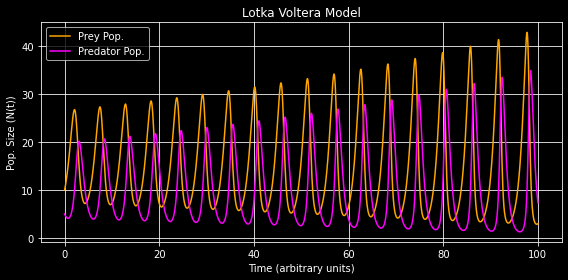

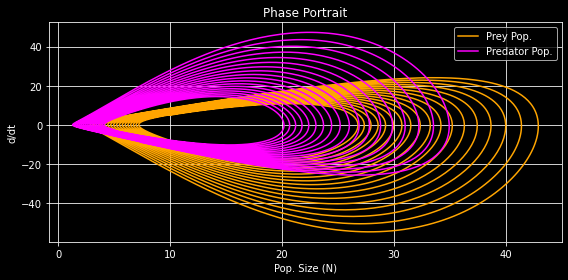

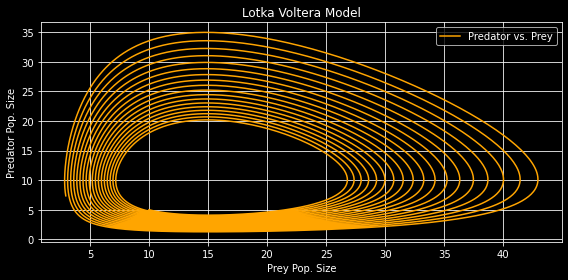

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# initialize the parameters
a=1.0 # prey birth rate
b=0.1 # predation rate
c= 1.5 # predator death rate
d= 0.1 # predator birth rate
dt= 0.01
T= 100

# Create the arrays
time= np.arange(0, T+dt, dt)
x= np.zeros(len(time))
y= np.zeros(len(time))
x[0], y[0]= 10, 5

# Simulation loop using Euler's Method
for i in range(1, len(time)):
    dx = a * x[i-1] - b * x[i-1] * y[i-1]
    dy = -c * y[i-1] + d * x[i-1] * y[i-1]
    x[i] = x[i-1] + dt * dx
    y[i] = y[i-1] + dt * dy
    
# Plot the numerically integrated results
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(time, x, color='orange', label='Prey Pop.')
plt.plot(time, y, color='magenta', label='Predator Pop.')
plt.title('Lotka Voltera Model')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Pop. Size (N(t))')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the phase portrait
dx_dt= a * x - b * x * y
dy_dt= -c * y + d * x * y
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.plot(x, dx_dt, color= 'orange', label='Prey Pop.')
plt.plot(y, dy_dt, color= 'magenta', label='Predator Pop.')
plt.title('Phase Portrait')
plt.xlabel('Pop. Size (N)')
plt.ylabel('d/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the pop. sizes against each other
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(x, y, color='orange', label='Predator vs. Prey')
plt.title('Lotka Voltera Model')
plt.xlabel('Prey Pop. Size')
plt.ylabel('Predator Pop. Size')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Lotka Volterra Model with Carrying Capacity

Now we'll extend the model to have a carrying capacity for the prey population. In the first model, The two populations can grow indefinitely as long as they don't collapse through feedback. Here's the updated model: 

$$
\begin{cases}
\frac{dx}{dt}= a\,x \,(1-\frac{x}{k}) - b\,x\,y \\
\frac{dy}{dt}= -c\,y+d\,x\,y 
\end{cases}
$$

where $k$ is the carrying capacity. 

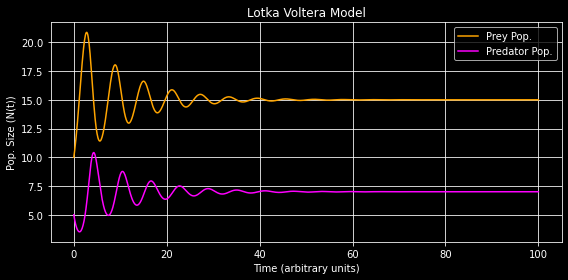

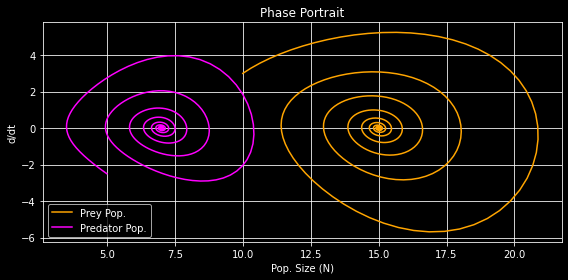

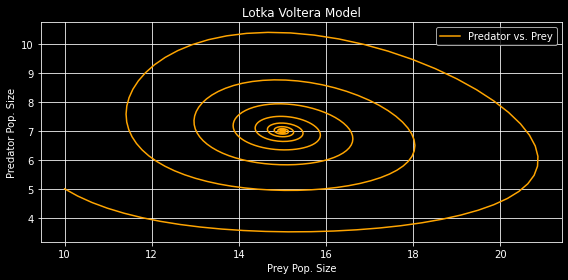

In [3]:
# Updated model with carrying capacity for prey
import numpy as np
import matplotlib.pyplot as plt

# initialize the parameters
a=1.0 # prey birth rate
k= 50
b=0.1 # predation rate
c= 1.5 # predator death rate
d= 0.1 # predator birth rate
dt= 0.1
T= 100

# Create the arrays
time= np.arange(0, T+dt, dt)
x= np.zeros(len(time))
y= np.zeros(len(time))
x[0], y[0]= 10, 5

# Simulation loop using Euler's Method
for i in range(1, len(time)):
    dx = a * x[i-1] * (1 - x[i-1] / k) - b * x[i-1] * y[i-1]
    dy = -c * y[i-1] + d * x[i-1] * y[i-1]
    x[i] = x[i-1] + dt * dx
    y[i] = y[i-1] + dt * dy
    
# Plot the numerically integrated results
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(time, x, color='orange', label='Prey Pop.')
plt.plot(time, y, color='magenta', label='Predator Pop.')
plt.title('Lotka Voltera Model')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Pop. Size (N(t))')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the phase portrait
dx_dt= a * x * (1 - x / k) - b * x * y
dy_dt= -c * y + d * x * y
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.plot(x, dx_dt, color= 'orange', label='Prey Pop.')
plt.plot(y, dy_dt, color= 'magenta', label='Predator Pop.')
plt.title('Phase Portrait')
plt.xlabel('Pop. Size (N)')
plt.ylabel('d/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the pop. sizes against each other
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(x, y, color='orange', label='Predator vs. Prey')
plt.title('Lotka Voltera Model')
plt.xlabel('Prey Pop. Size')
plt.ylabel('Predator Pop. Size')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## The Midpoint Method

In the previous models we used a first order `Runge-Kutta` method (i.e., Euler's method) for the numerical integration. This method uses the derivative (tangent) at each step to estimate the value of the characteristic function. In other words, it only uses the slope at the beginning of beginning of the timestep interval: 

$$
N(t+\Delta{t})\approx N(t) + \Delta{t}\cdot \frac{dN}{dt}(t)
$$

Or for a system of two differential equations:

$$
x_{i+1}= x_i + \Delta{t} \cdot f_1(x_i, y_i, ...)\\
y_{i+1}= y_i + \Delta{t} \cdot f_2(x_i, y_i, ...)
$$

This method works well for linear ODE's like the simple population growth model developed earlier, but tends to be less inaccurate for non-linear ODE's like the Lotka Volterra model where the rate of change of the derivative may be large at a given timepoint. 

To improve the accuracy and reduce the number of timesteps required to reach and appropriate degree of accuracy, we can use a second order method such as the midpoint method. 

This method computes the tangent at the beginning and end of the interval, and takes the midpoint (average) of the two. This doubles the number of calculations but enhances accuracy. 

1. Estimate the midpoint value using the half-step from the Euler method: 

$$
x_{mid}= x_i + \frac{\Delta{t}}{2} \cdot f(x_i,t_i)
$$

2. Use the slope at the midpoint to compute the next value

$$
x_{i+1}= x_i + \Delta{t} \cdot f(x_{mid}, t_i + \frac{\Delta{t}}{2})
$$

Note the difference between the previous simulation and the one below. The equilibrium point is the same for both models, but Euler's method takes longer to converge to it. However, they behave similarly if we increase $dt$ from 0.1 to 0.01 in the Euler's method model. This demonstrates how the midpoint method can give more accurate results at shorter timesteps. 

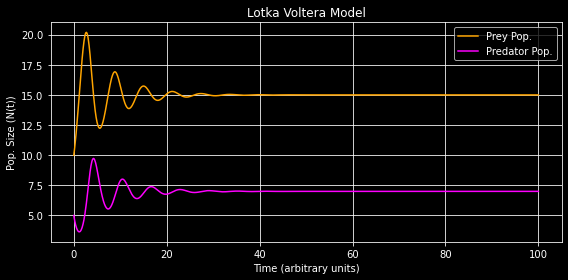

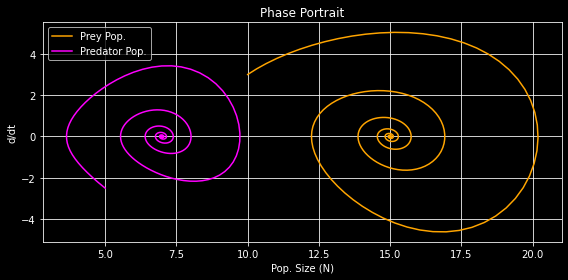

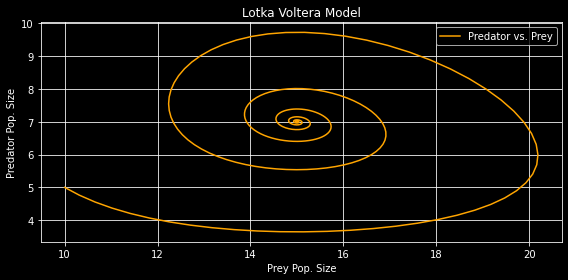

In [2]:
# Updated model with carrying capacity for prey
import numpy as np
import matplotlib.pyplot as plt

# initialize the parameters
a=1.0 # prey birth rate
k= 50
b=0.1 # predation rate
c= 1.5 # predator death rate
d= 0.1 # predator birth rate
dt= 0.1
T= 100

# Create the arrays
time= np.arange(0, T+dt, dt)
x= np.zeros(len(time))
y= np.zeros(len(time))
x[0], y[0]= 10, 5


# Simulation loop using the Midpoint Method
for i in range(1, len(time)):
    # Step 1: Compute derivatives at the current point
    dx1 = a * x[i-1] * (1 - x[i-1] / k) - b * x[i-1] * y[i-1]
    dy1 = -c * y[i-1] + d * x[i-1] * y[i-1]
    
    # Step 2: Estimate midpoint values
    x_mid = x[i-1] + 0.5 * dt * dx1
    y_mid = y[i-1] + 0.5 * dt * dy1

    # Step 3: Compute derivatives at the midpoint
    dx2 = a * x_mid * (1 - x_mid / k) - b * x_mid * y_mid
    dy2 = -c * y_mid + d * x_mid * y_mid

    # Step 4: Use midpoint derivatives to update state
    x[i] = x[i-1] + dt * dx2
    y[i] = y[i-1] + dt * dy2
    
# Plot the numerically integrated results
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(time, x, color='orange', label='Prey Pop.')
plt.plot(time, y, color='magenta', label='Predator Pop.')
plt.title('Lotka Voltera Model')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Pop. Size (N(t))')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the phase portrait
dx_dt= a * x * (1 - x / k) - b * x * y
dy_dt= -c * y + d * x * y
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.plot(x, dx_dt, color= 'orange', label='Prey Pop.')
plt.plot(y, dy_dt, color= 'magenta', label='Predator Pop.')
plt.title('Phase Portrait')
plt.xlabel('Pop. Size (N)')
plt.ylabel('d/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the pop. sizes against each other
plt.style.use('dark_background')
plt.figure(figsize= (8,4))
plt.plot(x, y, color='orange', label='Predator vs. Prey')
plt.title('Lotka Voltera Model')
plt.xlabel('Prey Pop. Size')
plt.ylabel('Predator Pop. Size')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()